In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, fetch_olivetti_faces, load_digits

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import rand_score, silhouette_score, adjusted_mutual_info_score

# Clustering

In supervised algorithms we have input, output pairs and the machine learning algorithms try to create a model that aims to create output by looking at the input only with some error. In unsupervised algorithms, we only have data and a task that we aim to accomplish using this data.

In the examples of unsupervised algorithms we have seen so far the task is to create a sensible partition of the data. This is called [clustering](https://en.wikipedia.org/wiki/Cluster_analysis). So, assume $D = \{ x^{(i)} \mid i=1,\ldots,N \}$ is our collection of data points and we want to create a partition

$$p_j\colon D\to \{ 1,\ldots, m \}$$

The ML algorithms we have seen so far to accomplish this task are

1. [k-means](https://en.wikipedia.org/wiki/K-means_clustering)
2. [hiearchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

Today, we are going to add a new example:

3. [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)

First, let us recall:

## K-Means

K-Means is a unsupervised algorithm. We have data points $D = \{ x^{(1)},\ldots,x^{(N)} \}$ and a number $k$. Here is a short description of the algorithm:

1. Start with randomly chosen points $c^{(1)},\ldots,c^{(k)}$ from $D$ and $k$ empty sets $S^{(1)},\ldots,S^{(k)}$.\n",
2. For each point $x^{(i)}$ in $D$, find the closest centroid $c^{(j)}$ and add $x^{(i)}$ to $S^{(j)}$.\n",
3. Find the center of each $S^{(i)}$ and call them $d^{(1)},\ldots,d^{(k)}$.\n",
4. If each $c^{(i)}$ and $d^{(i)}$ are close enough terminate the algorithm, if not assign $c^{(i)}\leftarrow d^{(i)}$ and go to step 2.\n",


## Hiearchical clustering

Here is the setup: Hierarchical clustering algorithm is an unsupervised algorithm. The algorithm gradually merge points into clusters. 

1. Place each point in a cluster that contain only themselves.
2. Merge two clusters with the smallest distance.
3. Repeat Step 2 until all clusters are merged.

The algorithm works by placing a ball $B_\epsilon(x)$ of radius $\epsilon$ on each $x\in D$. We merge two points $x_1$ and $x_2$ at a specific $\epsilon$ if $B_\epsilon(x_1)$ and $B_\epsilon(x_2)$ intersect. While this is straightforward for individual pairs of points, one has to decide how clusters of points merge when $\epsilon$ is large enough. This is called the *linkage* method. 

Let us use $ d_{(ij)k} $ to denote the distance between the clusters $ C_{k} $ and $ C_{ij} = C_i \cup C_j $ which is merged in a single cluster.  One calculates the distance 
\\[ d_{(ij)k} = \alpha_{ijk} d_{ik} +\alpha_{jik} d_{jk}+ \beta_{ijk} d_{ij} + \gamma|d_{ik}-d_{jk}| \\] 
for parameters $\alpha_{ijk}$, $\beta_{ijk}$ and $\gamma$ to be determined.  

The most frequently used linkage methods are 

1. Single
2. Complete
3. Average
4. Ward

The parameters for commonly used methods of calculating distances between clusters.

<table>
    <tr><th style="width:100px">Linkage</th>
        <th style="width:100px">$\alpha_{ijk}$</th>
        <th style="width:100px">$\beta_{ijk}$</th>
        <th style="width:100px">$\gamma$</th></tr>
    <tr><td>Single</td>
        <td>$\frac{1}{2}$</td>
        <td>0</td>
        <td>$-\frac{1}{2}$</td></tr>
    <tr><td>Complete</td>
        <td>$\frac{1}{2}$</td>
        <td>0</td>
        <td>$\frac{1}{2}$</td></tr>
    <tr><td>Average</td>
        <td>$\frac{n_i}{n_i+n_j}$</td>
        <td>0</td>
        <td>0</td></tr>
    <tr><td>Ward</td>
        <td>$\frac{n_i+n_k}{n_i+n_j+n_k}$</td>
        <td>$\frac{-n_k}{n_i+n_j+n_k}$</td>
        <td>0</td></tr>
</table>

## DBSCAN

DB-Scan is a unsupervised algorithm. So, we only have data points $x^{(1)},\ldots,x^{(N)}$ and no output labels. The parameters are

1. A real number $\epsilon>0$, and 
2. A natural number $N$,

The key concepts for this algorithm are

1. Core point
2. Density connected points
3. Density reachable points
   1. Direct
   2. Indirect
   3. Border points
   4. Outliers

### Core points

A point $x\in D$ is called a *core point* if $B_\epsilon(x)$ the ball with radius $\epsilon$ centered at $x$ contains $N$ points from $D$
    
### Density connected points

A pair of points $x$ and $y$ are called *density connected* if there is a core point $w$ such that $x,y\in B_\epsilon(w)$.

### Density reachable points

A point $x\in D$ is called a *directly density reachable* if $x$ is lies inside $B_\epsilon(u)$ the disk of radius $\epsilon$ centered at a core point $u$.

We call a point *indirectly density reachable* if there is a link of density connected points $x^{(1)},\ldots,x^{(p)}$ i.e. $d(x^{(i)},x^{(i+1)})<\epsilon$ for $i=1,\ldots,p-1$ and $d(x^{(p)},x)<\epsilon$.

### Border points

A point $x$ is called a *border point* if it is a density reachable point but $B_\epsilon(x)$ has less than $N$ points from $D$.

### Outlier points

A point $x$ is called an outlier if $B_\epsilon(x)$ contains less than $N$ points and $x$ is not a density reachable point.

### The Algorithm
    
We put point a collection of points $x^{(1)},\ldots,x^{(\ell)}$ in the same cluster if they are density reachable from each other.

## An Example

For this example, we are going to use the [wine dataset]() 

In [49]:
wine = load_wine()
wine_X = wine['data']
wine_y = wine['target']
pd.DataFrame(wine_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


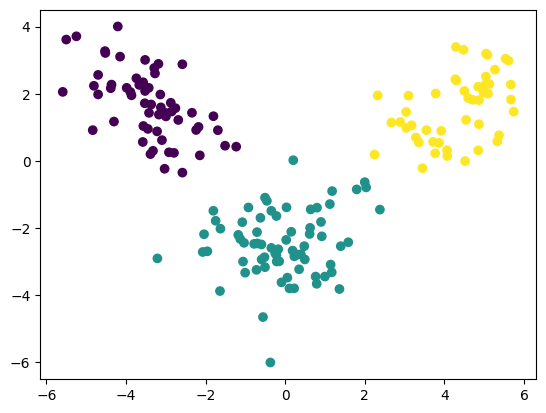

In [50]:
projector = LinearDiscriminantAnalysis(n_components=2)
wine_points = projector.fit_transform(wine_X,wine_y)
plt.scatter(wine_points[:,0],wine_points[:,1],c=wine_y)

In [51]:
model = DBSCAN(eps=0.9,min_samples=4)
wine_y_pred = model.fit_predict(wine_points)
wine_y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [52]:
pd.crosstab(wine_y,wine_y_pred)

col_0,-1,0,1,2
row_0,,,,
0,0,59,0,0
1,4,0,67,0
2,0,0,1,47


## Another Example

For this example, we are going to use the Olivetti faces dataset.

In [53]:
faces = fetch_olivetti_faces()
faces_X = faces['data']
faces_y = faces['target']

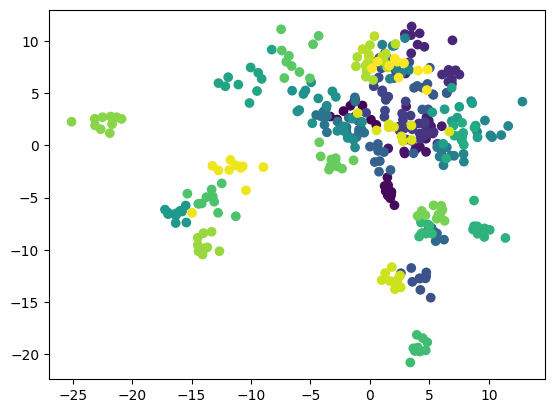

In [68]:
projector = LinearDiscriminantAnalysis(n_components=5)
faces_points = projector.fit_transform(faces_X,faces_y)
plt.scatter(faces_points[:,0],faces_points[:,1],c=faces_y)

In [69]:
model = DBSCAN(eps=2.0,min_samples=3)
faces_y_pred = model.fit_predict(faces_points)
pd.crosstab(faces_y,faces_y_pred)

col_0,-1,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
row_0,,,,,,,,,,,,,,,,,,,,,
0,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0


## An Important Question

### How can we check the quality of a clustering scheme?

Since (technically) we don't have a collection of outputs that we need to match with the input, how can we check the quality of a clustering scheme becomes an important problem we must solve. For this purpose there are several metrics we can use. The most commonly used ones are

1. [rand score](https://en.wikipedia.org/wiki/Rand_index)
2. [silhoutte score](https://en.wikipedia.org/wiki/Silhouette_(clustering))
3. [mutual information](https://en.wikipedia.org/wiki/Adjusted_mutual_information)

### Rand score

Let us assume our dataset $D$ contains $N$ points $x^{(1)},\ldots,x^{(N)}$. Let us assume we have two partitions $P = \{ p_1 ,\ldots, p_n \}$ and $Q = \{ q_1,\ldots,q_m \}$. Let us define

1. $a$: the number of pairs of elements in $D$ that are in the same partition subset in $P$ and partition subset in $Q$.
2. $b$: the number of pairs of elements in $D$ that are in different subsets in $P$ and in $Q$.
3. $c$: the number of pairs of elements in $D$ that are in the same subset in $P$ but in different subsets in $Q$.
4. $d$  the number of pairs of elements in $D$ that are in different subsets in $P$ but in the same subset in $Q$.

Consider the following simple example

$D = \{ 1,2,3,4 \}$, $P = \{ \{1,2\}, \{3,4\} \}$ and $Q = \{\{1,2\}, \{3\} ,\{4\}\}$.

Let us enumerate all pairs:

1. (1,2): They are the same partition in $P$ and $Q$.
2. (1,3): They are in different partitions in both $P$ and $Q$.
3. (1,4): They are in different partitions in both $P$ and $Q$.
4. (2,3): They are in different partitions in both $P$ and $Q$.
5. (2,4): They are in different partitions in both $P$ and $Q$.
6. (3,4): They are in the same partition in $P$ but different partition in $Q$.

Thus we get $a = 1$, $b = 4$, $c=1$, $d=0$. The rand index is

$$ \frac{a+b}{\binom{N}{2}} = \frac{5}{6} $$

The closer the index to 1 the better the alignment between $P$ and $Q$.

In [70]:
rand_score(wine_y,wine_y_pred)

0.9757506506697137

In [71]:
rand_score(faces_y, faces_y_pred)

0.8918295739348371

In [75]:
tmp = pd.crosstab(faces_y,faces_y_pred)
tmp.iloc[:10,:10]

col_0,-1,0,1,2,3,4,5,6,7,8
row_0,,,,,,,,,,
0,6,4,0,0,0,0,0,0,0,0
1,0,0,10,0,0,0,0,0,0,0
2,6,0,0,4,0,0,0,0,0,0
3,3,0,0,0,7,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,10,0,0,0,0
6,0,0,0,0,0,0,10,0,0,0
7,1,0,0,0,0,0,0,9,0,0
8,2,0,0,0,0,0,0,0,8,0


### Silhouette score

Assume we have a partition $P = \{ p_1,\ldots, p_n \}$ for a collection of points $D = x^{(1)},\ldots,x^{(N)}$. For any point $x^{(i)}\in D$ and $x^{(i)}\in p_j$ define

$$ a_i = \frac{1}{|p_j|-1}\sum_{x\in p_j} d(x,x^{(i)}) $$
and
$$ b_{i,\ell} = \frac{1}{|p_\ell|} \sum_{x\in p_\ell} d(x,x^{(i)}) \quad\text{ and }\quad b_i = \min_{\ell\neq j} b_{i,\ell} $$

The silhoutte score of a point $s_i$ is defined as 0 if the point is its own partition set, and
$$ s_i = \frac{b_i-a_i}{\max(a_i,b_i)} $$
and the silhouette score of a partition is
$$ SC(P) = \max_i s_i $$

For the example $D = \{ 1,2,3,4\}$ with $P = \{ \{1,2\}, \{3,4\} \}$ we have
$$ a_1 = 1, a_2 = 1, a_3 = 1, a_4 = 1$$
$$ b_1 = 2.5, b_2 = 1.5, b_3 = 1.5, b_4 = 2.5 $$
$$ s_1 = 0.6, s_2 = 0.33, s_3 = 0.33, s_4 = 0.6 $$
and $SC(P)=0.6$.

We want $s_i \approx 1$ for every point.

In [89]:
silhouette_score(wine_points,wine_y),\
silhouette_score(wine_points,wine_y_pred)

(0.6631699986077089, 0.5670944631855264)

In [90]:
silhouette_score(faces_points,faces_y),\
silhouette_score(faces_points,faces_y_pred)

(0.5824440036280003, 0.2488261078796301)

### Mutual Information

Every probability distribution carries an inherent information measured by [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)). Given a partition $Q = \{ q_1,\ldots,q_n\}$ of a dataset $D = \{ x^{(1)},\ldots, x^{(N)} \}$ the probability that a point lies in partition subset $q_j$ is 
$P_j = \frac{|q_j|}{N}$. The entropy (information content) of the partition then is calculated as

$$ H(Q) = \sum_j -P_J \log(P_J) $$

Let us assume we have another partition $U = \{ U_1, \ldots, U_m \}$ and we calculate its information content as

$$ H(U) = \sum_j -P'_j \log(P'_j) \quad\text{ where }\quad P'_j = \frac{|U_j|}{N} $$

When we compare these partitions we get the mutual information as

$$ H(U|V) = \sum_i\sum_j \frac{|P_i\cap U_j|}{N}\log\left(\frac{N\cdot |P_i\cap U_j|}{|P_i||U_j|}\right) $$

Let us re-consider the example $D = \{1,2,3,4\}$ with $P = \{\{1,2\},\{3,4\}\}$ and $Q = \{\{1,2\},\{3\},\{4\}\}$.

$H(P) = -\frac{2}{4}\log_2(2/4) - \frac{2}{4}\log_2(2/4) = 1$

$H(Q) = -\frac{2}{4}\log_2(2/4) - \frac{1}{4}\log_2(1/4) - \frac{1}{4}\log_2(1/4) = 3/2$

$ p_1 \cap q_1 = \{1,2\} $

$ p_1 \cap q_2 = \emptyset = p_1\cap q_3 = p_2 \cap q_1 $

$ p_2 \cap q_2 = \{3\}$ 

$ p_2 \cap q_3 = \{4\}$

$ H(P|Q) = \frac{2}{4}\log_2(2) + \frac{1}{4} \log_2(2) + \frac{1}{4}\log_2(2) = 1$

In [91]:
adjusted_mutual_info_score(wine_y,wine_y_pred)

0.9355486013340095

In [92]:
adjusted_mutual_info_score(faces_y,faces_y_pred)

0.6620518780918894

## A final example


In [99]:
raw = load_digits()
digits_X = raw['data']
digits_y = raw['target']
digits_y

array([0, 1, 2, ..., 8, 9, 8])

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


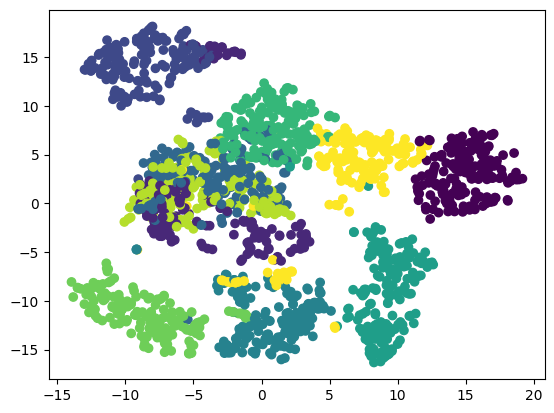

In [140]:
projector = TSNE(n_components=3)
digits_points = projector.fit_transform(digits_X,digits_y)
plt.scatter(digits_points[:,0],digits_points[:,1],c=digits_y)

In [178]:
model = DBSCAN(eps=2.5,min_samples=13)
digits_y_pred = model.fit_predict(digits_points)
pd.crosstab(digits_y,digits_y_pred)

col_0,-1,0,1,2,3,4,5,6,7,8,9,10,11,12
row_0,,,,,,,,,,,,,,
0,0,178,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,62,0,0,90,27,0
2,10,0,1,0,0,0,0,0,0,166,0,0,0,0
3,0,0,170,0,0,0,1,0,0,0,0,0,0,12
4,3,0,0,178,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,1,0,0,0,0,180,0,0,0
6,0,0,0,0,0,181,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,179,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,166,2,0,0,2,0,0


In [157]:
rand_score(digits_y,digits_y_pred)

0.9652638088970358

In [158]:
adjusted_mutual_info_score(digits_y,digits_y_pred)

0.89770346062734

In [159]:
silhouette_score(digits_points,digits_y)

0.5032832

In [160]:
silhouette_score(digits_points,digits_y_pred)

0.510759

In [186]:
model = KMeans(n_clusters=3)
wine_y_pred = model.fit_predict(wine_X)
wine_y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [187]:
pd.crosstab(wine_y,wine_y_pred)

col_0,0,1,2
row_0,,,
0,0,46,13
1,50,1,20
2,19,0,29


In [188]:
rand_score(wine_y,wine_y_pred)

0.718656763791024

In [189]:
adjusted_mutual_info_score(wine_y,wine_y_pred)

0.4226866642766121

In [190]:
silhouette_score(wine_X,wine_y)

0.20008297882823028

In [192]:
silhouette_score(wine_X,wine_y_pred)

0.5711381937868838